In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,NaN,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
num = []
cat = []
date = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    num.append(column)
  elif df[column].dtypes in ['datettime64[ns]']:
    date.append(column)
  else :
    cat.append(column)

print('num',num)
print('cat',cat)
print('date',date)

num ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
cat ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
date []


In [5]:
df[num].describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


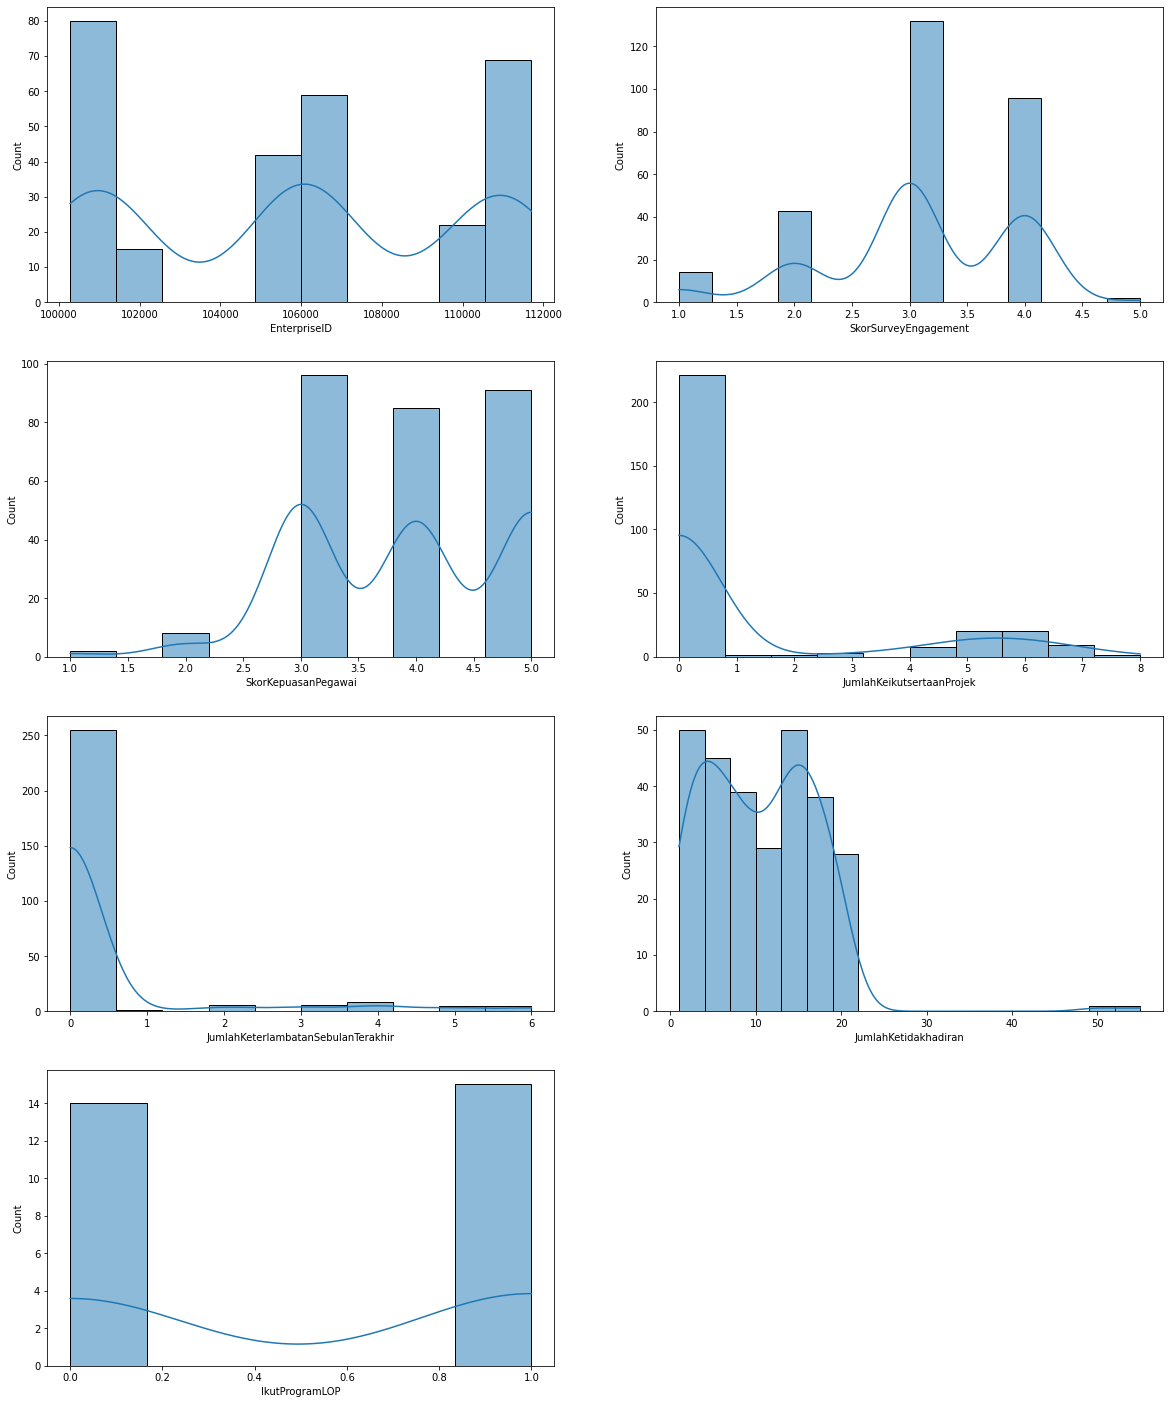

In [6]:
plt.figure(figsize=(20,25))
for i in range(len(num)) :
  plt.subplot (4,2,i+1)
  sns.histplot(data=df[num[i]], kde=True)
  plt.tight_layout
plt.show()

In [7]:
df[cat].describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


In [8]:
df['TanggalResign'].value_counts()

-             198
2018-04-01      9
2014-8-19       9
2018-06-08      9
2017-11-15      9
2013-5-30       4
2020-8-19       2
2014-9-24       2
2015-04-01      1
2016-01-11      1
2016-10-31      1
2017-12-15      1
2015-6-18       1
2014-04-07      1
2017-4-15       1
2015-06-05      1
2017-11-14      1
2018-9-15       1
2019-9-26       1
2017-09-05      1
2016-4-24       1
2017-06-04      1
2016-01-09      1
2017-12-12      1
2016-3-31       1
2015-4-15       1
2020-9-26       1
2020-4-29       1
2015-01-09      1
2018-11-15      1
2018-6-16       1
2018-09-06      1
2019-01-12      1
2018-9-19       1
2019-04-06      1
2019-08-04      1
2017-09-12      1
2016-04-04      1
2018-2-19       1
2016-08-07      1
2015-6-15       1
2016-08-02      1
2015-01-07      1
2013-9-26       1
2018-9-23       1
2017-11-04      1
2019-06-06      1
2020-9-27       1
2020-2-25       1
2017-3-15       1
2018-5-17       1
2015-6-24       1
2017-6-25       1
Name: TanggalResign, dtype: int64

In [9]:
df[df['TanggalResign']=='-']

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
5,emptyMacaw4,106419,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,Indeed,...,+6283886053xxx,emptyMacaw4468@yahoo.com,Sarjana,1,0.0,masih_bekerja,1980-05-12,2016-10-02,2020-02-06,-
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,...,+6285735701xxx,madZebra1244@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,-
7,cynicalMandrill7,110500,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Kurang,Jakarta Selatan,LinkedIn,...,+6281293511xxx,cynicalMandrill7920@hotmail.com,Magister,1,NaN,masih_bekerja,1983-08-24,2013-07-08,2020-1-14,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,peacefulChamois3,106257,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6282208741xxx,peacefulChamois3574@icloud.com,Doktor,1,NaN,NaN,1980-04-18,2013-07-08,2020-1-22,-
280,anxiousTeal2,111378,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Employee_Referral,...,+6289567915xxx,anxiousTeal2015@gmail.com,Sarjana,1,NaN,NaN,1984-09-16,2014-11-10,2020-01-04,-
281,anxiousWasp6,100628,Bercerai,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,...,+6281806218xxx,anxiousWasp6788@outlook.com,Sarjana,1,NaN,NaN,1983-09-04,2017-2-15,2020-1-23,-
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-


In [10]:
df[df['TanggalResign']=='-']['AlasanResign'].value_counts()

masih_bekerja    132
Name: AlasanResign, dtype: int64

In [11]:
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

In [12]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

In [13]:
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

In [14]:
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
num = []
cat = []
date = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    num.append(column)
  elif df[column].dtypes in ['datetime64[ns]']:
    date.append(column)
  else :
    cat.append(column)

print('num',num)
print('cat',cat)
print('date',date)

num ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
cat ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']
date ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

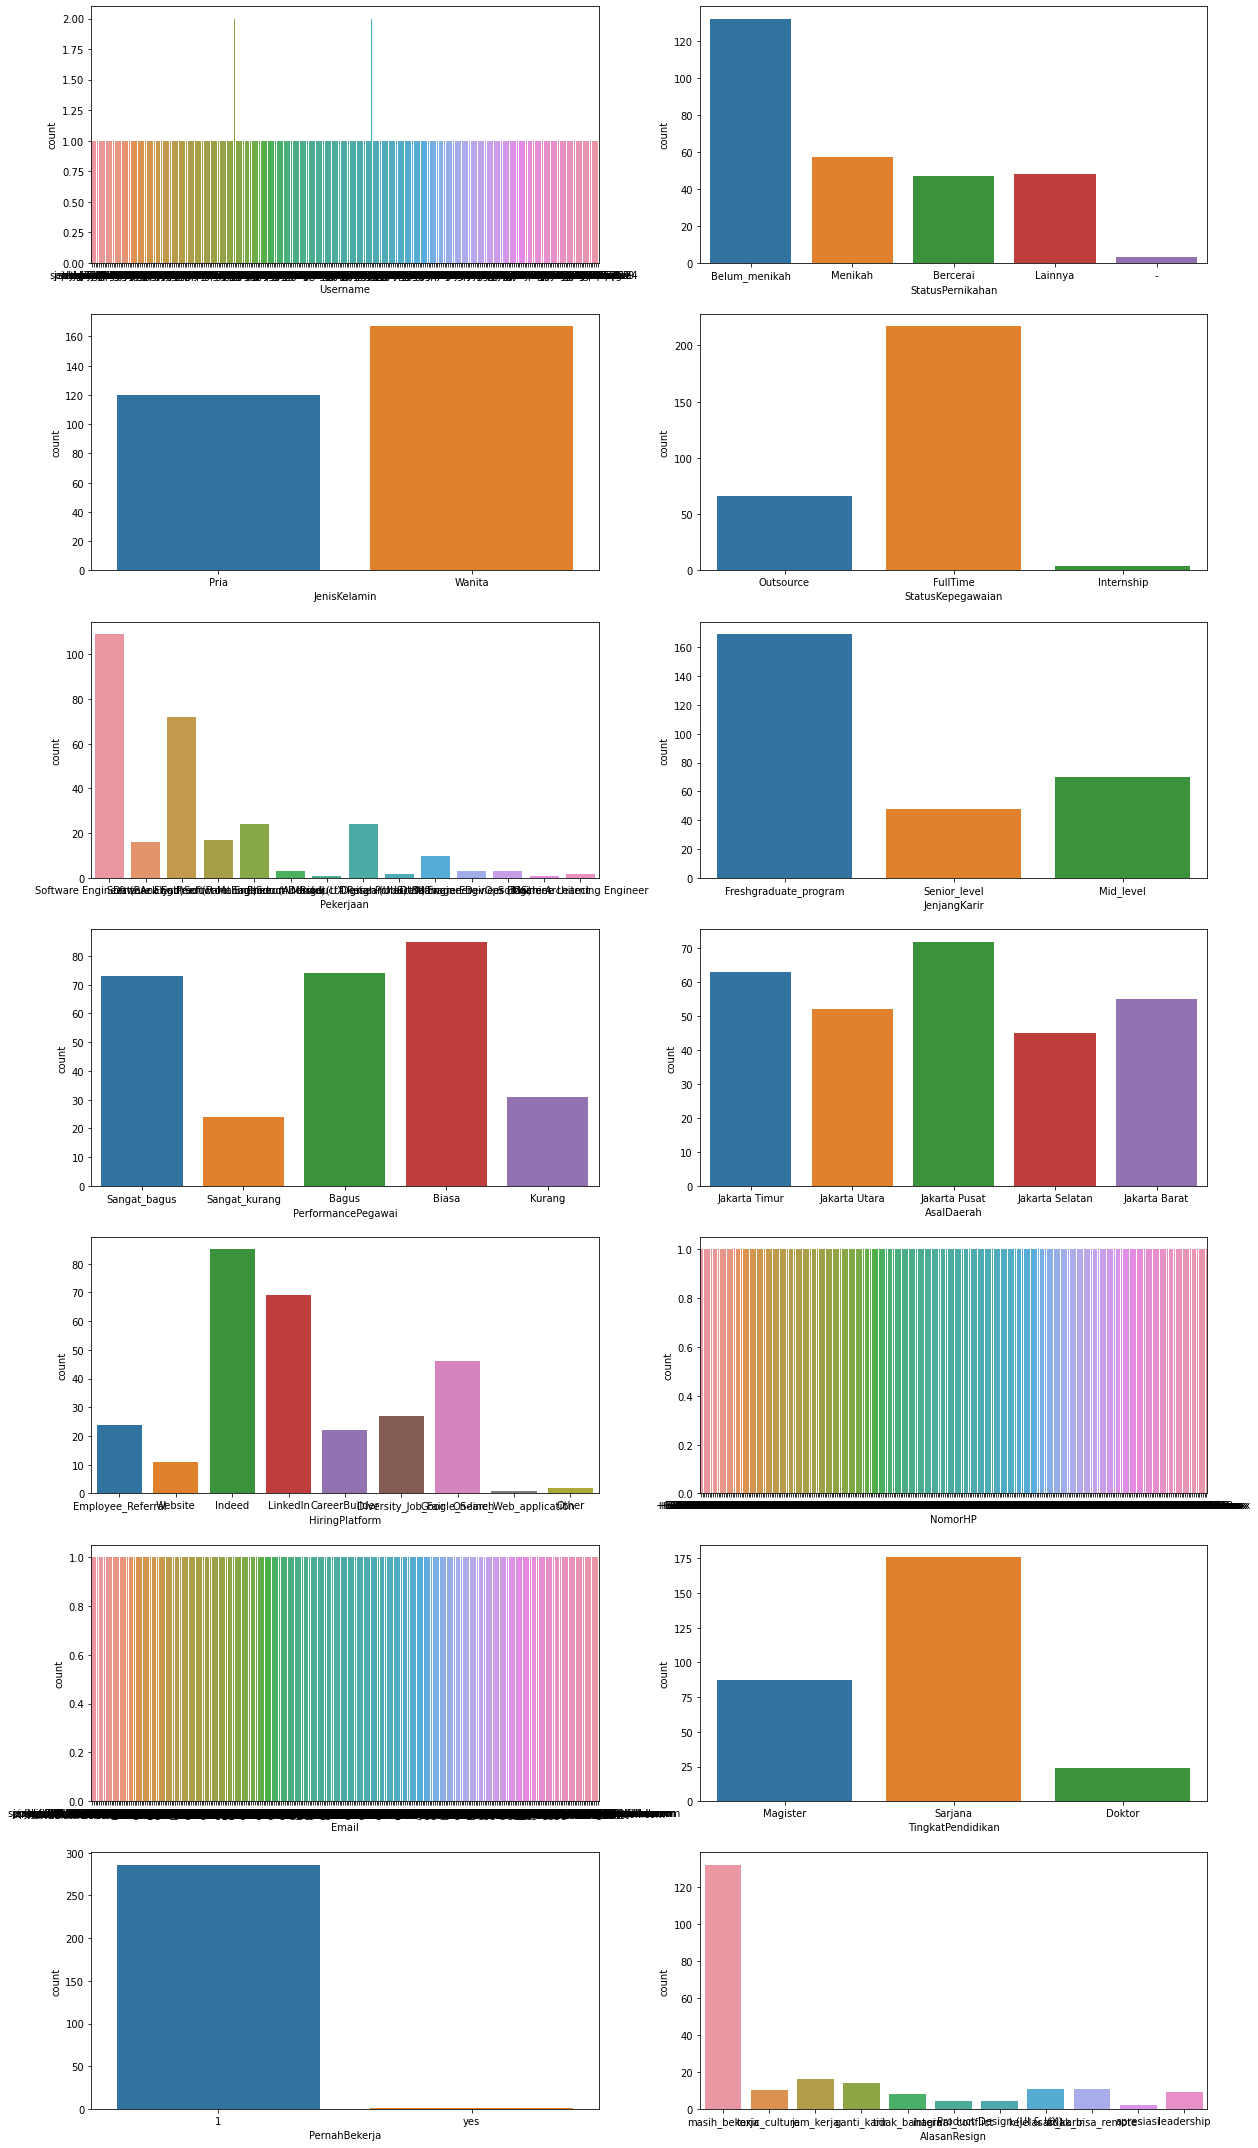

In [16]:
plt.figure(figsize=(20,50))
for i in range(len(cat)) :
  plt.subplot (9,2,i+1)
  sns.countplot(data=df, x = cat[i])
  plt.tight_layout
plt.show()

In [17]:
df['PernahBekerja'].value_counts()

1      286
yes      1
Name: PernahBekerja, dtype: int64

In [18]:
df['PernahBekerja'] = df['PernahBekerja'].replace(1,'yes')

In [19]:
df['PernahBekerja'].value_counts()

yes    287
Name: PernahBekerja, dtype: int64

In [20]:
df['Resigned'] = np.where(df['TanggalResign'].isna(),0,1)

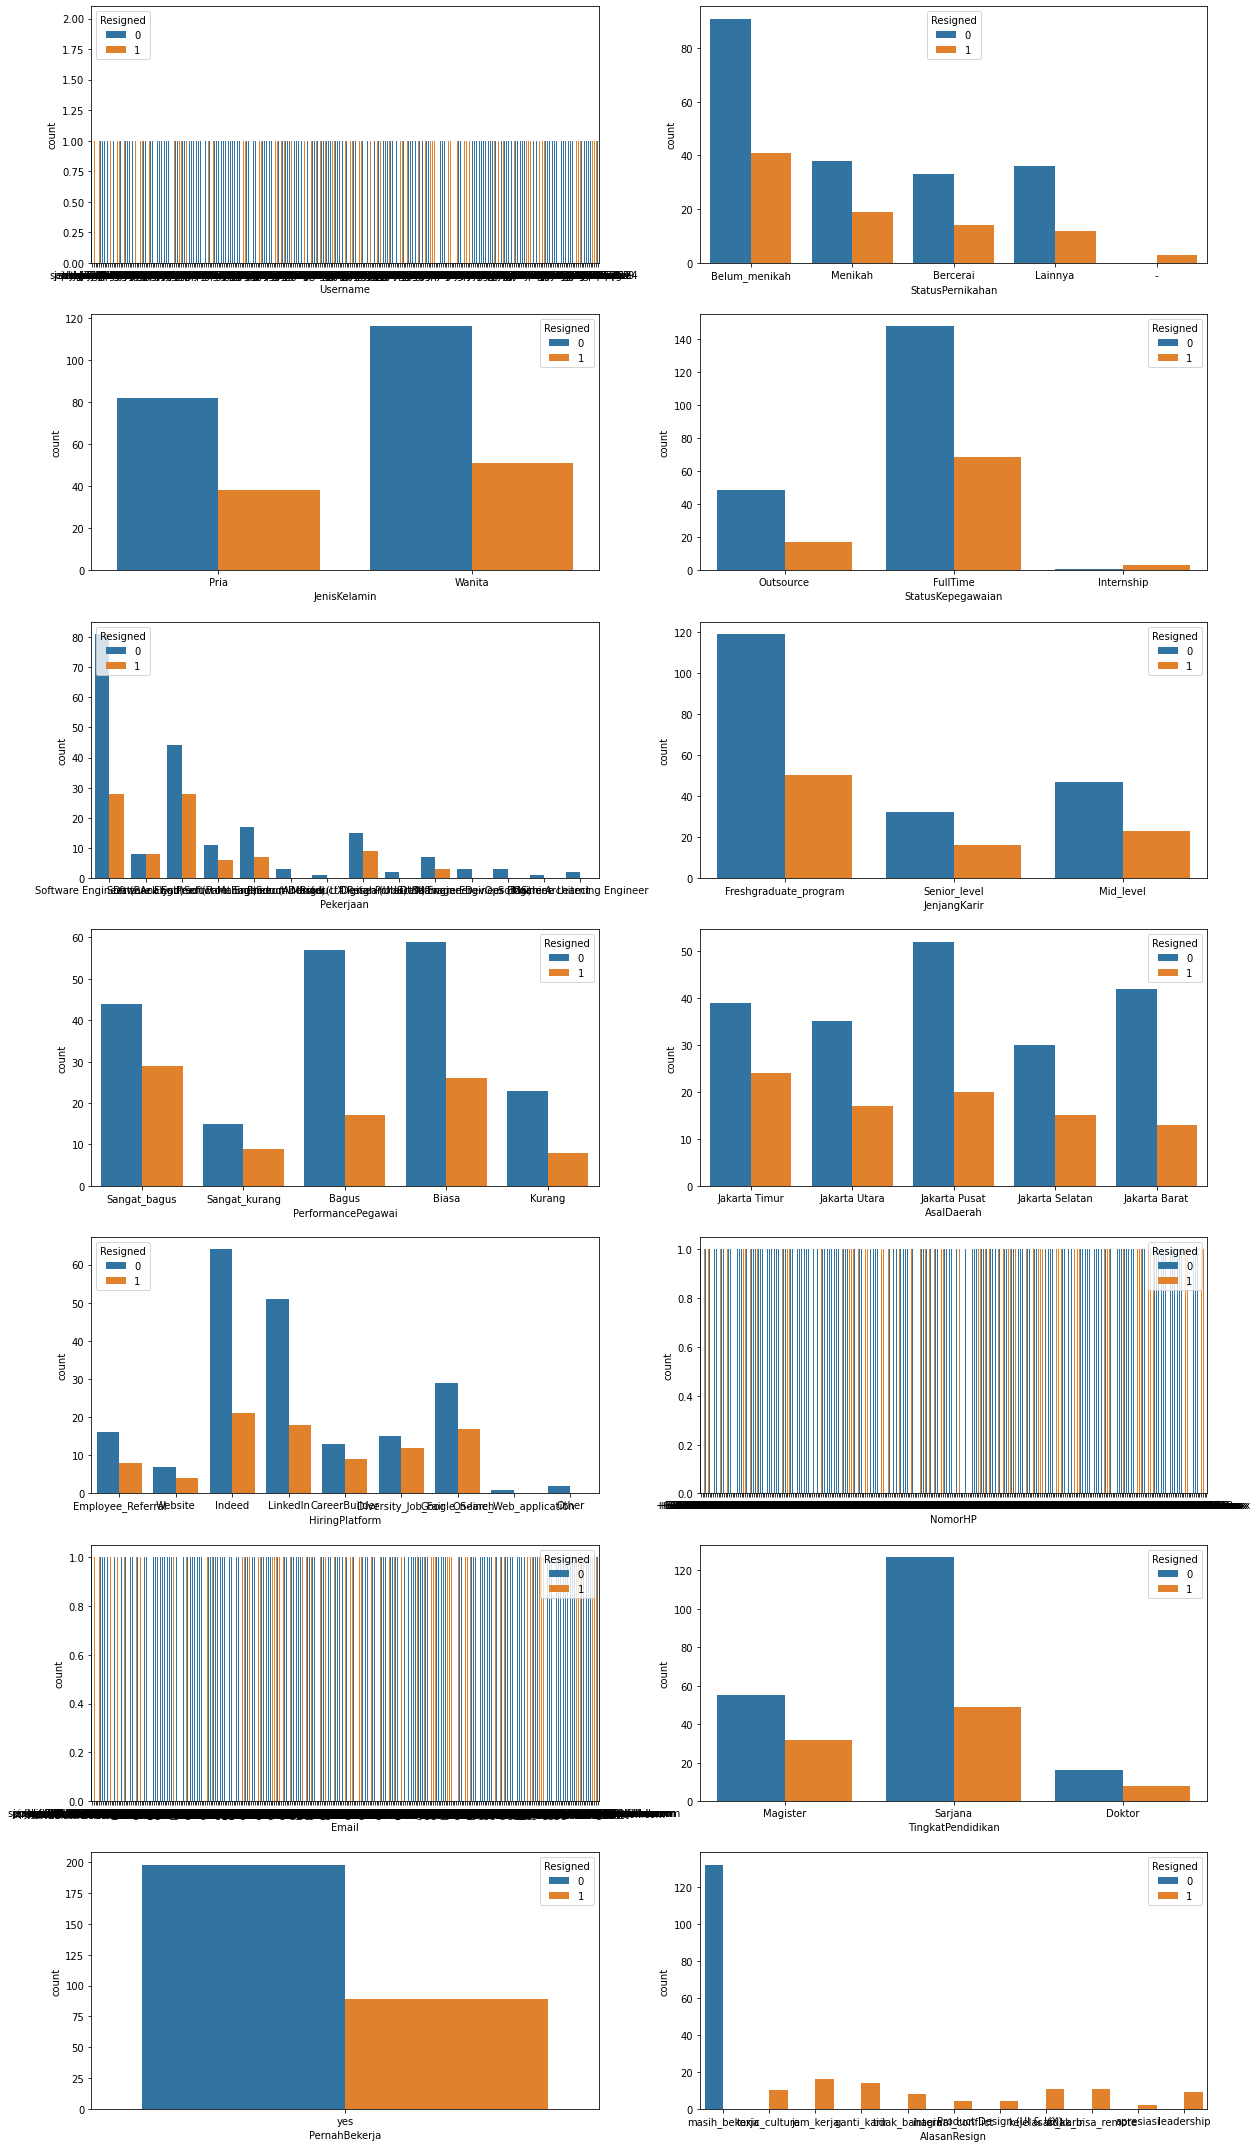

In [21]:
plt.figure(figsize=(20,50))
for i in range(len(cat)) :
  plt.subplot (9,2,i+1)
  sns.countplot(data=df, x = cat[i], hue = 'Resigned')
  plt.tight_layout
plt.show()

In [22]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [23]:
df['SkorKepuasanPegawai'].value_counts()

3.0    96
5.0    91
4.0    85
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64

In [24]:
df['SkorKepuasanPegawai'].quantile(.5)

4.0

In [25]:
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(4)

In [26]:
df['JumlahKeikutsertaanProjek'].value_counts()

0.0    221
6.0     20
5.0     20
7.0      9
4.0      8
3.0      3
1.0      1
2.0      1
8.0      1
Name: JumlahKeikutsertaanProjek, dtype: int64

In [27]:
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(0)

In [28]:
df['JumlahKeterlambatanSebulanTerakhir'].value_counts()

0.0    255
4.0      8
3.0      6
2.0      6
5.0      5
6.0      5
1.0      1
Name: JumlahKeterlambatanSebulanTerakhir, dtype: int64

In [29]:
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(0)

In [30]:
df['JumlahKetidakhadiran'].value_counts()

4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     16
14.0    16
3.0     16
19.0    15
13.0    15
17.0    14
1.0     14
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
12.0     7
18.0     7
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

In [31]:
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(0)

In [32]:
df['JumlahKetidakhadiran'].value_counts()

4.0     20
2.0     20
15.0    19
16.0    17
7.0     17
14.0    16
6.0     16
3.0     16
13.0    15
19.0    15
1.0     14
17.0    14
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
12.0     7
18.0     7
0.0      6
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

In [33]:
df['IkutProgramLOP'].value_counts()

1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64

In [34]:
df['IkutProgramLOP'] = df['IkutProgramLOP'].fillna(0)

In [35]:
df['IkutProgramLOP'].value_counts()

0.0    272
1.0     15
Name: IkutProgramLOP, dtype: int64

In [36]:
df['AlasanResign'].value_counts()

masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [37]:
df[df['AlasanResign'].isna()]['Resigned'].value_counts()

0    66
Name: Resigned, dtype: int64

In [38]:
df[df['AlasanResign']=='masih_bekerja']['Resigned'].value_counts()

0    132
Name: Resigned, dtype: int64

In [39]:
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')

In [40]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                          0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [41]:
df.duplicated().sum()

0

In [42]:
df = df.drop(columns='PernahBekerja')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [44]:
df[['EnterpriseID']].duplicated().sum()

0

In [45]:
df['Email'].duplicated().sum()

0

In [46]:
df['NomorHP'].duplicated().sum()

0

Nomor 2

In [47]:
df['TahunHiring'] = df['TanggalHiring'].dt.year

In [48]:
df['TahunResign'] = df['TanggalResign'].dt.year

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [50]:
annual_hiring = df[['TahunHiring','EnterpriseID']].groupby('TahunHiring').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'TahunHiring':'Tahun','EnterpriseID':'JumlahHiring'})

In [51]:
annual_hiring

,Tahun,JumlahHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [52]:
annual_resign = df[['TahunResign','EnterpriseID']].groupby('TahunResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'TahunResign':'Tahun','EnterpriseID':'JumlahResign'})

In [53]:
annual_resign

,Tahun,JumlahResign
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [54]:
annual_turnover = annual_hiring.merge(annual_resign, how='left', on = 'Tahun')
annual_turnover

,Tahun,JumlahHiring,JumlahResign
0,2006,1,NaN
1,2007,2,NaN
2,2008,2,NaN
3,2009,7,NaN
4,2010,8,NaN
5,2011,76,NaN
6,2012,41,NaN
7,2013,43,5.0
8,2014,56,12.0
9,2015,31,8.0


In [55]:
annual_turnover['JumlahResign'] = annual_turnover['JumlahResign'].fillna(0)
annual_turnover

,Tahun,JumlahHiring,JumlahResign
0,2006,1,0.0
1,2007,2,0.0
2,2008,2,0.0
3,2009,7,0.0
4,2010,8,0.0
5,2011,76,0.0
6,2012,41,0.0
7,2013,43,5.0
8,2014,56,12.0
9,2015,31,8.0


In [56]:
annual_turnover['PerubahanKaryawan'] = annual_turnover['JumlahHiring'] - annual_turnover['JumlahResign']

In [57]:
total_karyawan = 0
list_jumlah_karyawan = []
for i in range(len(annual_turnover)):
  total_karyawan += annual_turnover['PerubahanKaryawan'][i]
  list_jumlah_karyawan.append(total_karyawan)
print(list_jumlah_karyawan)


[1.0, 3.0, 5.0, 12.0, 20.0, 96.0, 137.0, 175.0, 219.0, 242.0, 248.0, 234.0, 209.0]


In [58]:
annual_turnover['TotalKaryawan'] = list_jumlah_karyawan

In [59]:
annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan
0,2006,1,0.0,1.0,1.0
1,2007,2,0.0,2.0,3.0
2,2008,2,0.0,2.0,5.0
3,2009,7,0.0,7.0,12.0
4,2010,8,0.0,8.0,20.0
5,2011,76,0.0,76.0,96.0
6,2012,41,0.0,41.0,137.0
7,2013,43,5.0,38.0,175.0
8,2014,56,12.0,44.0,219.0
9,2015,31,8.0,23.0,242.0


In [60]:
total_hiring = 0
list_total_hiring = []
for i in range(len(annual_turnover)):
  total_hiring += annual_turnover['JumlahHiring'][i]
  list_total_hiring.append(total_hiring)
annual_turnover['TotalHiring'] = list_total_hiring

In [61]:
total_resign = 0
list_total_resign = []
for i in range(len(annual_turnover)):
  total_resign += annual_turnover['JumlahResign'][i]
  list_total_resign.append(total_resign)
annual_turnover['TotalResign'] = list_total_resign

In [62]:
annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan,TotalHiring,TotalResign
0,2006,1,0.0,1.0,1.0,1,0.0
1,2007,2,0.0,2.0,3.0,3,0.0
2,2008,2,0.0,2.0,5.0,5,0.0
3,2009,7,0.0,7.0,12.0,12,0.0
4,2010,8,0.0,8.0,20.0,20,0.0
5,2011,76,0.0,76.0,96.0,96,0.0
6,2012,41,0.0,41.0,137.0,137,0.0
7,2013,43,5.0,38.0,175.0,180,5.0
8,2014,56,12.0,44.0,219.0,236,17.0
9,2015,31,8.0,23.0,242.0,267,25.0


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


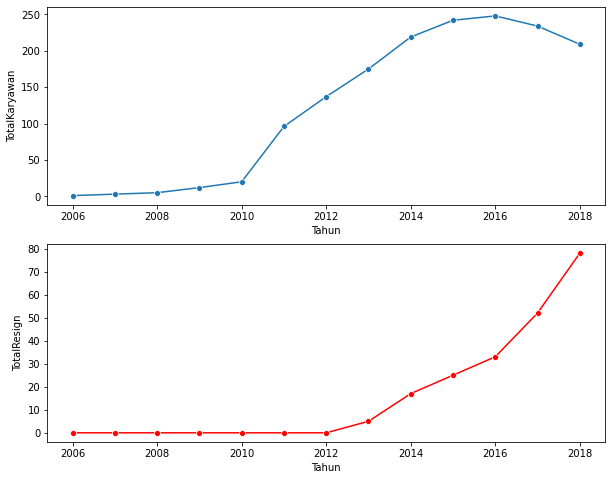

In [63]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.lineplot(data = annual_turnover, x ='Tahun', y = 'TotalKaryawan', marker = 'o')
plt.subplot(2,1,2)
sns.lineplot(data = annual_turnover, x ='Tahun', y = 'TotalResign', marker = 'o', color='R')
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [65]:
resign_data = df[df['Resigned']==1][['Pekerjaan', 'EnterpriseID']].groupby('Pekerjaan').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
unresign_data =df[df['Resigned']==0][['Pekerjaan', 'EnterpriseID']].groupby('Pekerjaan').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahTidakResign'})

In [66]:
resign_data

,Pekerjaan,JumlahResign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [67]:
unresign_data

,Pekerjaan,JumlahTidakResign
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [68]:
job_resign_data = unresign_data.merge(resign_data, how='outer', on='Pekerjaan')
job_resign_data

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,NaN
3,Digital Product Manager,2,NaN
4,Machine Learning Engineer,2,NaN
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,NaN
7,Product Manager,11,6.0
8,Scrum Master,3,NaN
9,Software Architect,1,NaN


In [69]:
job_resign_data = job_resign_data.fillna(0)
job_resign_data

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


In [70]:
job_resign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pekerjaan          14 non-null     object 
 1   JumlahTidakResign  14 non-null     int64  
 2   JumlahResign       14 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 448.0+ bytes


In [71]:
job_resign_data['JumlahResign'] = job_resign_data['JumlahResign'].astype('int64')

In [72]:
job_resign_data

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


In [73]:
job_resign_data['TotalEmployee'] = job_resign_data['JumlahResign'] + job_resign_data['JumlahTidakResign']

In [74]:
job_resign_data

,Pekerjaan,JumlahTidakResign,JumlahResign,TotalEmployee
0,Data Analyst,8,8,16
1,Data Engineer,7,3,10
2,DevOps Engineer,3,0,3
3,Digital Product Manager,2,0,2
4,Machine Learning Engineer,2,0,2
5,Product Design (UI & UX),15,9,24
6,Product Design (UX Researcher),1,0,1
7,Product Manager,11,6,17
8,Scrum Master,3,0,3
9,Software Architect,1,0,1


In [75]:
job_resign_data['PersentaseTidakResign'] = ((job_resign_data['JumlahTidakResign']/job_resign_data['TotalEmployee'])*100).round(2)

In [76]:
job_resign_data = job_resign_data.sort_values(by='PersentaseTidakResign', ascending= False).reset_index(drop=True)

In [77]:
job_resign_data

,Pekerjaan,JumlahTidakResign,JumlahResign,TotalEmployee,PersentaseTidakResign
0,DevOps Engineer,3,0,3,100.00
1,Digital Product Manager,2,0,2,100.00
2,Machine Learning Engineer,2,0,2,100.00
3,Product Design (UX Researcher),1,0,1,100.00
4,Scrum Master,3,0,3,100.00
5,Software Architect,1,0,1,100.00
6,Software Engineer (iOS),3,0,3,100.00
7,Software Engineer (Back End),81,28,109,74.31
8,Software Engineer (Android),17,7,24,70.83
9,Data Engineer,7,3,10,70.00


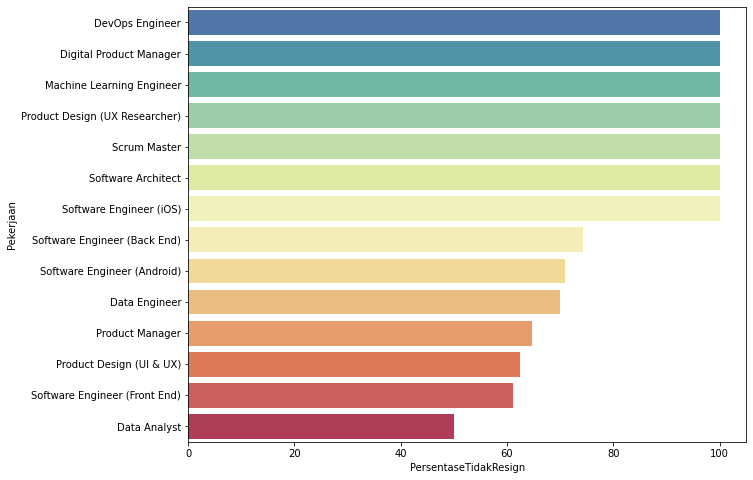

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(data=job_resign_data, y='Pekerjaan', x='PersentaseTidakResign', orient='h', palette='Spectral_r')
plt.show()

In [79]:
data_analyst_resign_data = df[(df['Pekerjaan']=='Data Analyst') & (df['Resigned']==1)]
data_analyst_resign_data

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,2014,2018.0
18,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,...,Sarjana,1.0,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,1,2012,2017.0
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,...,Sarjana,0.0,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,1,2016,2017.0
102,brainyFish3,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,...,Sarjana,0.0,toxic_culture,1984-05-09,2012-04-02,2014-02-20,2018-06-08,1,2012,2018.0
106,troubledThrushe9,101192,-,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,...,Sarjana,0.0,toxic_culture,1987-01-07,2013-01-07,2020-01-30,2014-08-19,1,2013,2014.0
108,jealousIguana3,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,...,Sarjana,0.0,toxic_culture,1976-09-22,2015-03-30,2020-01-21,2014-08-19,1,2015,2014.0
233,jumpyBuck8,100317,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,...,Magister,0.0,toxic_culture,1970-02-11,2009-07-06,2020-01-25,2015-06-05,1,2009,2015.0
239,finickySwift5,105296,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,...,Magister,0.0,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-06-25,1,2011,2017.0


In [80]:
jenjang_karir_data_analyst_resign = data_analyst_resign_data[['JenjangKarir','EnterpriseID']].groupby('JenjangKarir').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
performa_pegawai_data_analyst_resign = data_analyst_resign_data[['PerformancePegawai','EnterpriseID']].groupby('PerformancePegawai').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
alasan_resign_data_analyst_resign = data_analyst_resign_data[['AlasanResign','EnterpriseID']].groupby('AlasanResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

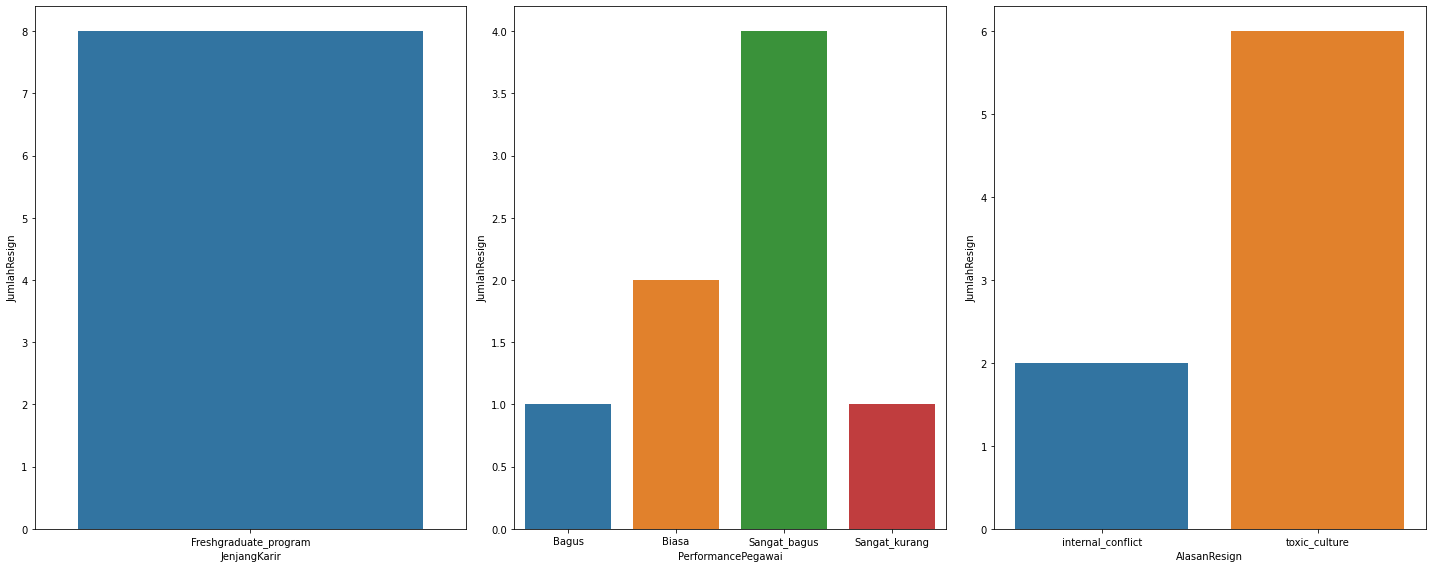

In [81]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot (data = jenjang_karir_data_analyst_resign, x = 'JenjangKarir', y ='JumlahResign')
plt.subplot(1,3,2)
sns.barplot (data = performa_pegawai_data_analyst_resign, x = 'PerformancePegawai', y ='JumlahResign')
plt.subplot(1,3,3)
sns.barplot (data = alasan_resign_data_analyst_resign, x = 'AlasanResign', y ='JumlahResign')
plt.tight_layout()

In [82]:
resigned_data = df[df['Resigned']==1]

In [83]:
jenjang_karir_all_resign = resigned_data[['JenjangKarir','EnterpriseID']].groupby('JenjangKarir').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
performa_pegawai_all_resign = resigned_data[['PerformancePegawai','EnterpriseID']].groupby('PerformancePegawai').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
alasan_resign_all_resign = resigned_data[['AlasanResign','EnterpriseID']].groupby('AlasanResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

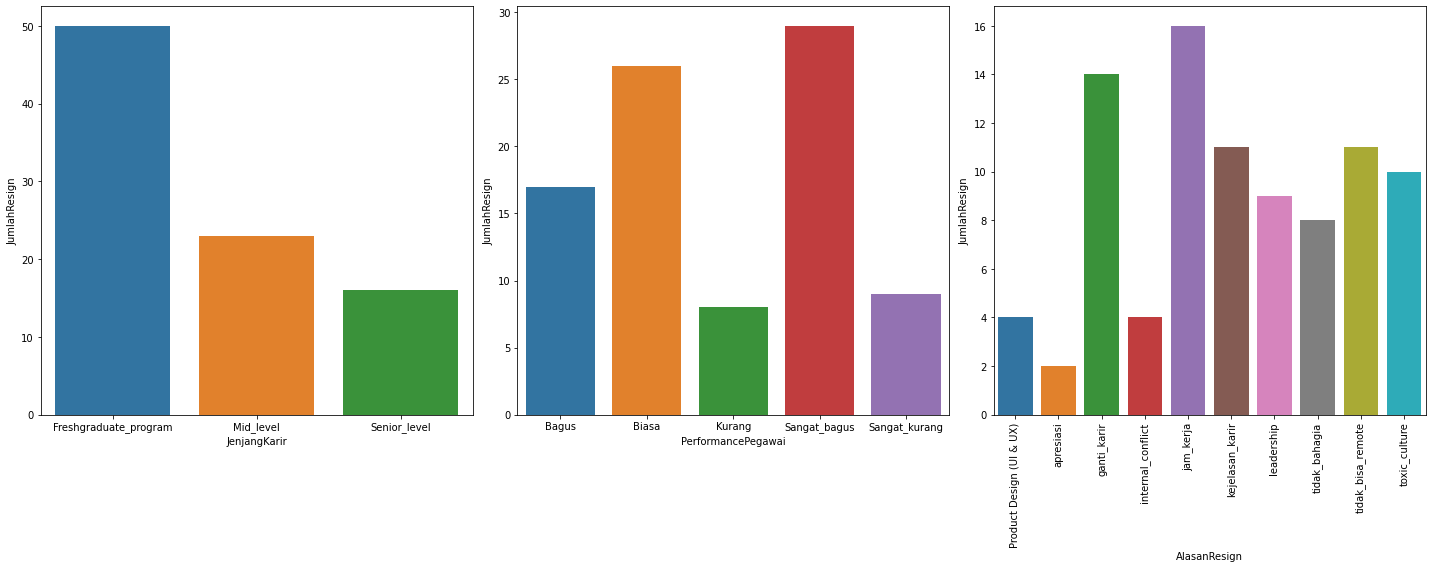

In [84]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot (data = jenjang_karir_all_resign, x = 'JenjangKarir', y ='JumlahResign')
plt.subplot(1,3,2)
sns.barplot (data = performa_pegawai_all_resign, x = 'PerformancePegawai', y ='JumlahResign')
plt.tight_layout()
plt.subplot(1,3,3)
sns.barplot (data = alasan_resign_all_resign, x = 'AlasanResign', y ='JumlahResign')
plt.xticks(rotation=90)
plt.tight_layout()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [86]:
df.sample(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,...,Doktor,0.0,internal_conflict,1986-09-01,2014-09-29,2020-01-18,2019-06-06,1,2014,2019.0
78,somberCod8,110312,Bercerai,Pria,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,Employee_Referral,...,Sarjana,0.0,masih_bekerja,1983-02-18,2013-09-30,2020-02-25,NaT,0,2013,NaN
16,pacifiedRaisins7,101236,Menikah,Pria,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Pusat,Diversity_Job_Fair,...,Sarjana,0.0,masih_bekerja,1976-12-03,2012-01-09,2020-01-31,NaT,0,2012,NaN
227,alertSyrup3,111486,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Biasa,Jakarta Utara,Google_Search,...,Sarjana,0.0,masih_bekerja,1987-03-18,2011-04-04,2019-07-02,NaT,0,2011,NaN
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,Sarjana,0.0,masih_bekerja,1973-12-08,2011-09-26,2016-03-01,NaT,0,2011,NaN
220,soreDunbird3,101434,Belum_menikah,Pria,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Utara,LinkedIn,...,Magister,0.0,masih_bekerja,1982-07-22,2011-05-16,2016-03-30,NaT,0,2011,NaN
84,scornfulCoati1,110699,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Senior_level,Kurang,Jakarta Barat,Google_Search,...,Magister,0.0,toxic_culture,1983-09-02,2012-04-02,2019-04-12,2020-09-27,1,2012,2020.0
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,Sarjana,0.0,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,1,2013,2017.0
43,shamefulIguana0,101682,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Barat,Indeed,...,Magister,0.0,masih_bekerja,1967-06-05,2013-02-18,2020-01-14,NaT,0,2013,NaN
19,guiltyMoth4,100621,Lainnya,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Utara,Indeed,...,Sarjana,0.0,masih_bekerja,1967-04-19,2014-07-07,2020-01-31,NaT,0,2014,NaN


In [87]:
num = []
cat = []
date = []

for i in df:
  if df[i].dtypes in ['int64','float64'] :
    num.append(i)
  if df[i].dtypes == 'datetime64[ns]' :
    date.append(i)
  else :
    cat.append(i)

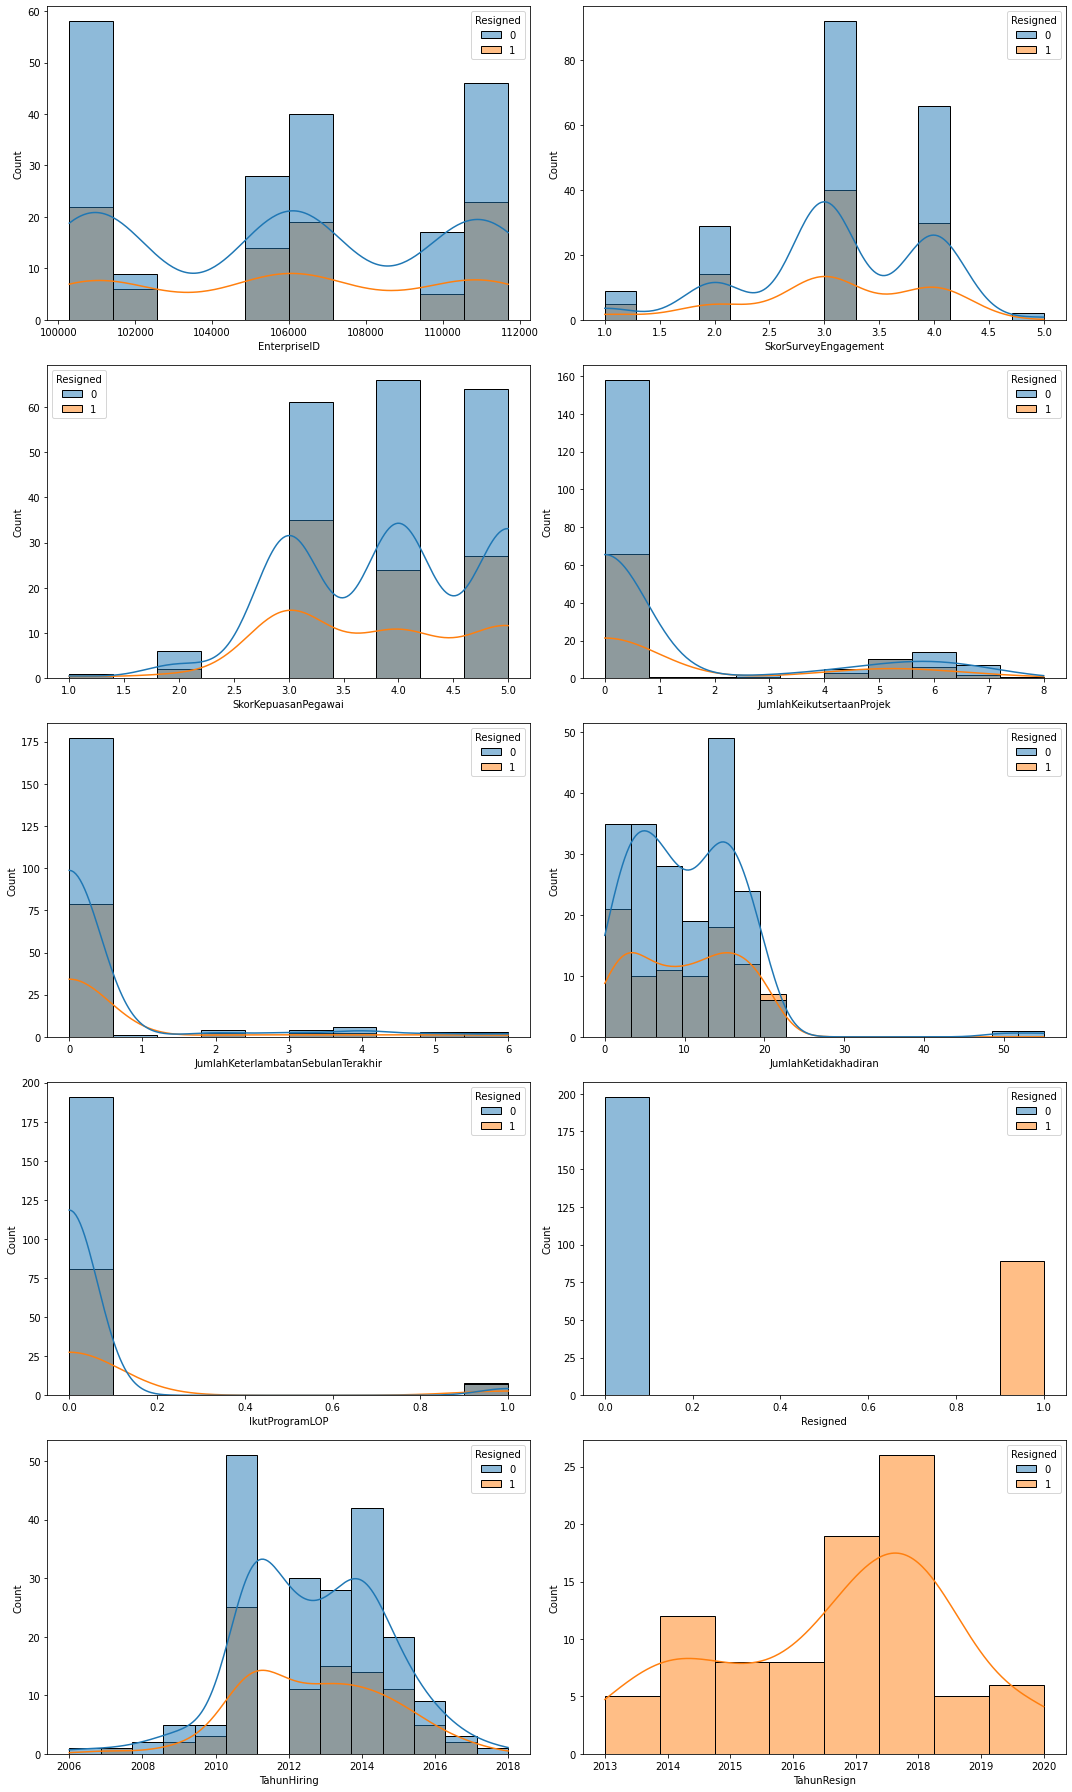

In [88]:
plt.figure(figsize=(15,25))
for i in range(len(num)) :
  plt.subplot(5,2,i+1)
  sns.histplot(data=df, x=num[i], kde= True, hue ='Resigned')
  plt.tight_layout()

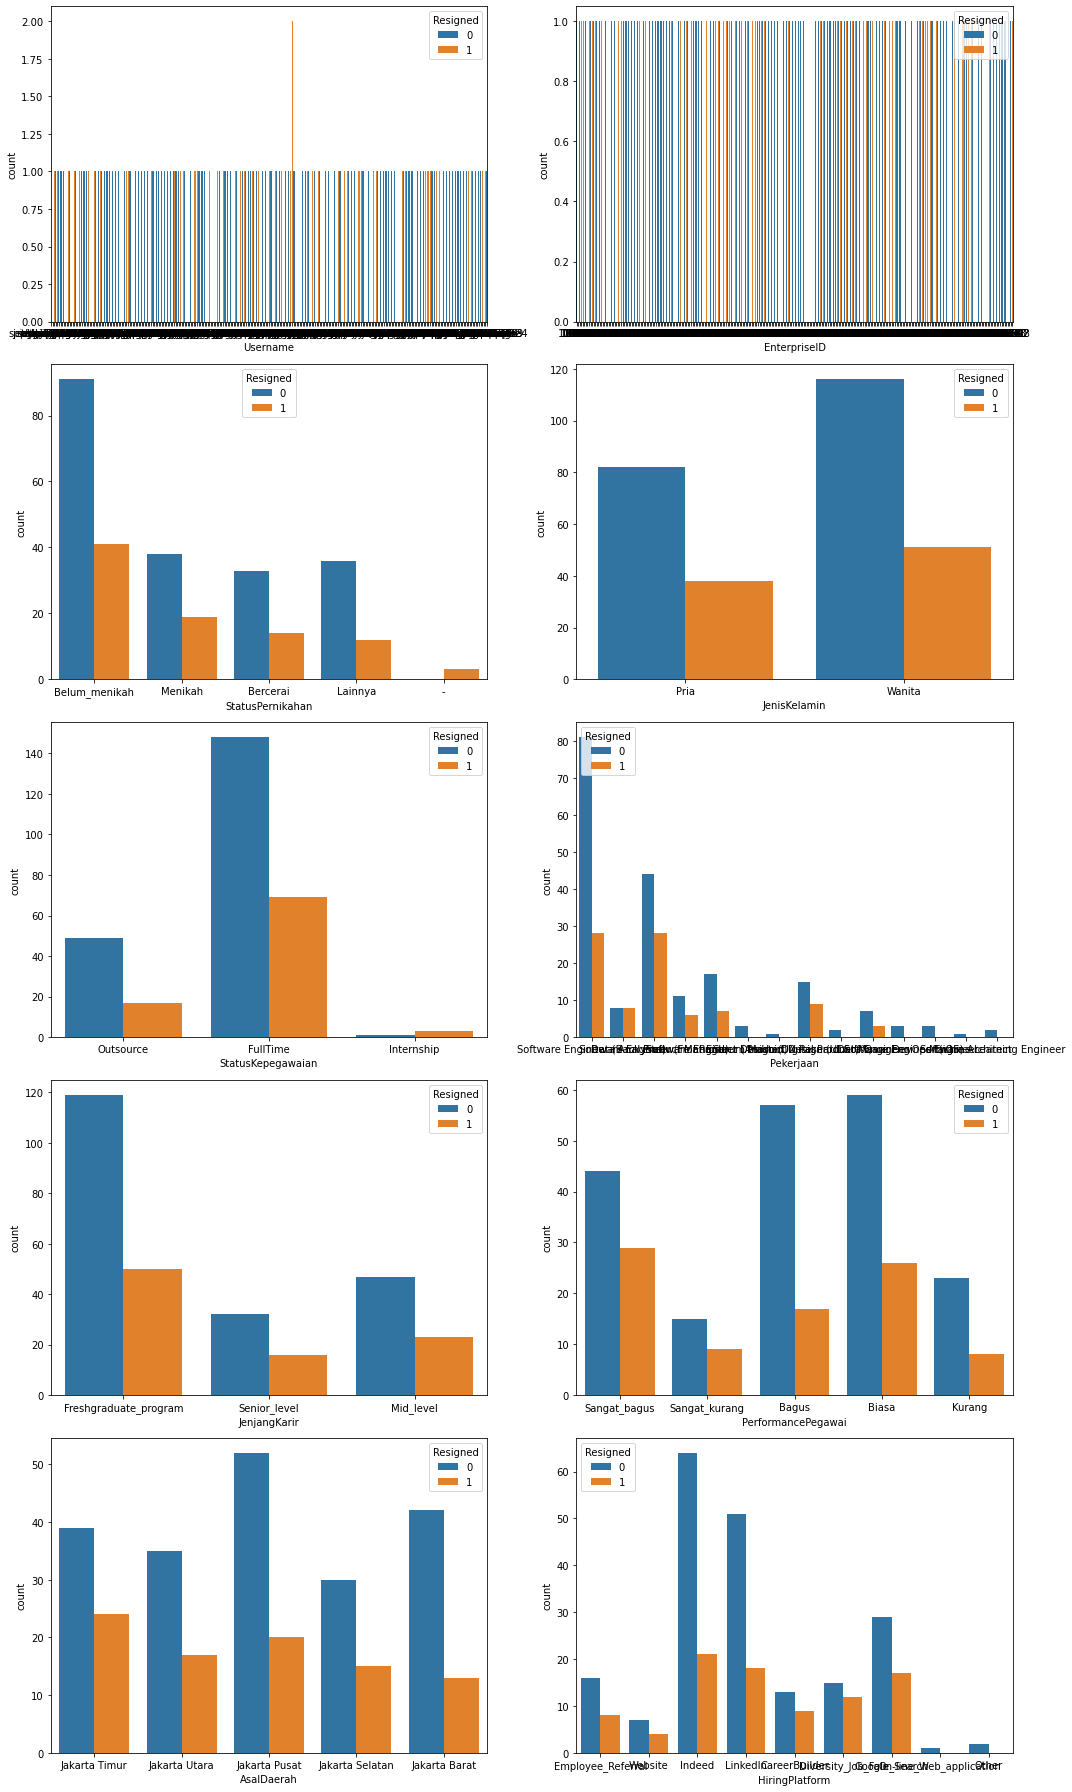

In [89]:
plt.figure(figsize=(15,25))
for i in range(len(num)) :
  plt.subplot(5,2,i+1)
  sns.countplot(data=df, x=cat[i],hue ='Resigned')
  plt.tight_layout()

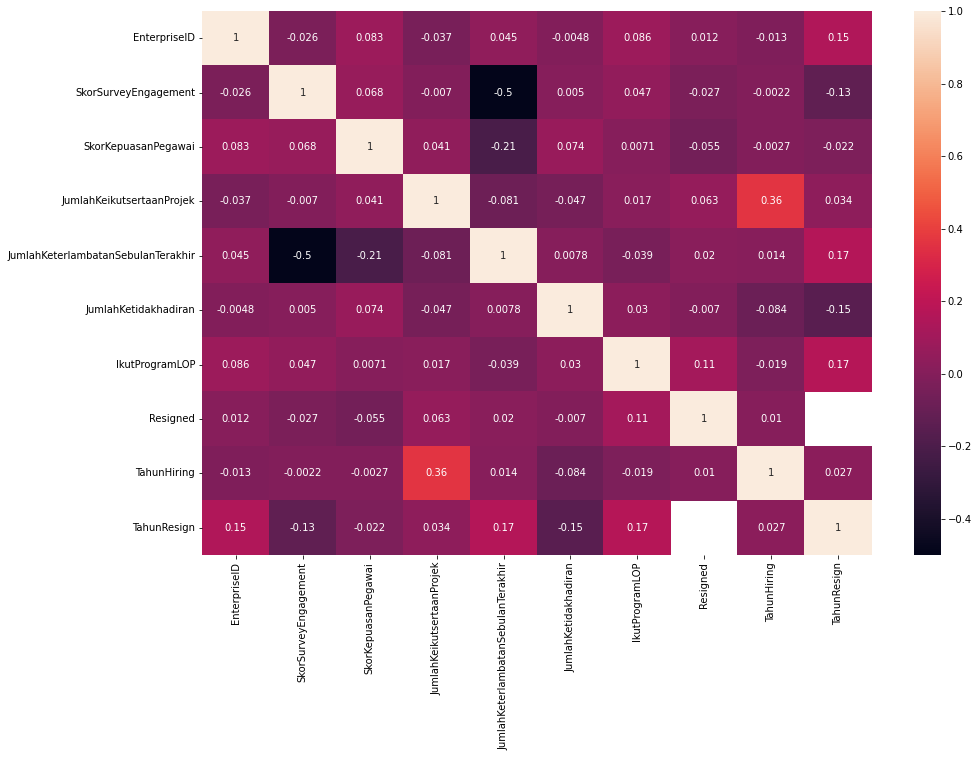

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(), annot=True)
plt.show()

In [91]:
# feature selection 1
features = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'JenjangKarir', 'IkutProgramLOP', 'PerformancePegawai','Resigned']
df_feature = df[features]

In [92]:
df_feature

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,JenjangKarir,IkutProgramLOP,PerformancePegawai,Resigned
0,4,4.0,0.0,0.0,9.0,Freshgraduate_program,1.0,Sangat_bagus,0
1,4,4.0,4.0,0.0,3.0,Freshgraduate_program,1.0,Sangat_kurang,1
2,4,3.0,0.0,0.0,11.0,Freshgraduate_program,1.0,Bagus,1
3,3,3.0,0.0,4.0,6.0,Freshgraduate_program,0.0,Bagus,0
4,3,3.0,0.0,0.0,11.0,Freshgraduate_program,0.0,Bagus,1
...,...,...,...,...,...,...,...,...,...
282,2,5.0,0.0,0.0,16.0,Mid_level,0.0,Bagus,0
283,4,5.0,0.0,0.0,11.0,Freshgraduate_program,0.0,Biasa,1
284,2,5.0,0.0,0.0,17.0,Senior_level,1.0,Biasa,1
285,4,5.0,0.0,0.0,20.0,Mid_level,0.0,Bagus,1


In [93]:
df['JenjangKarir'].value_counts()

Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: JenjangKarir, dtype: int64

In [94]:
df['PerformancePegawai'].value_counts()

Biasa            85
Bagus            74
Sangat_bagus     73
Kurang           31
Sangat_kurang    24
Name: PerformancePegawai, dtype: int64

In [95]:
df_feature['JenjangKarirEncoded'] = np.where(df_feature['JenjangKarir']=='Freshgraduate_program', 1,
                                             np.where(df_feature['JenjangKarir']=='Mid_level', 2, 3))
df_feature['PerformancePegawaiEncoded'] = np.where(df_feature['PerformancePegawai']=='Sangat_kurang', 1, 
                                                   np.where(df_feature['PerformancePegawai']=='Kurang', 2,
                                                            np.where(df_feature['PerformancePegawai']=='Biasa', 3,
                                                                     np.where(df_feature['PerformancePegawai']=='Bagus', 4, 5))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
df_feature.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,Resigned,JenjangKarirEncoded,PerformancePegawaiEncoded
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,3.101045,3.905923,1.167247,0.411150,10.229965,0.052265,0.310105,1.578397,3.491289
std,0.836388,0.905423,2.285537,1.273018,6.991709,0.222949,0.463344,0.761821,1.217196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,3.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,4.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,0.000000,1.000000,2.000000,5.000000
max,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000,1.000000,3.000000,5.000000


In [97]:
df_feature = df_feature.drop(columns =['JenjangKarir', 'PerformancePegawai'])

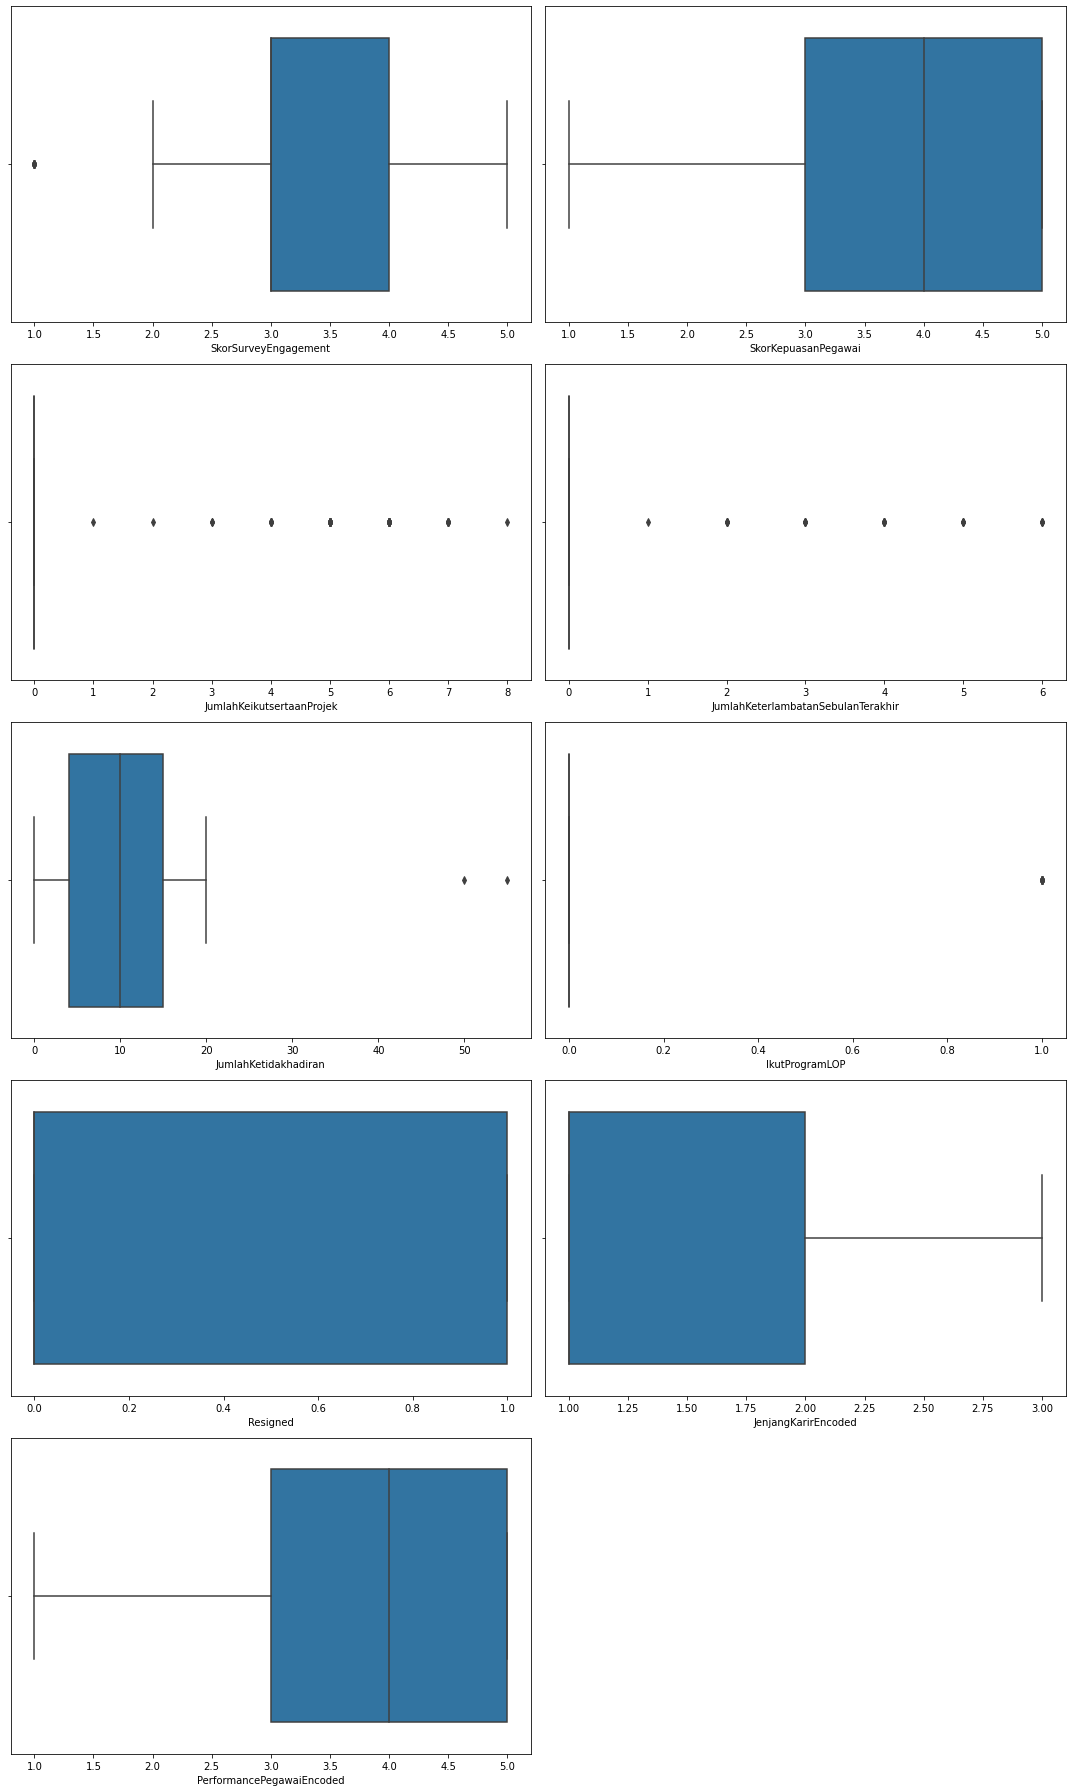

In [98]:
plt.figure(figsize=(15,25))
n = 0
for i in df_feature :
  n += 1
  plt.subplot(5,2,n)
  sns.boxplot(data=df_feature, x=i)
  plt.tight_layout()

In [99]:
df_feature[df_feature['JumlahKetidakhadiran']>20]

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,Resigned,JenjangKarirEncoded,PerformancePegawaiEncoded
12,4,3.0,0.0,0.0,50.0,0.0,0,1,3
115,4,5.0,0.0,0.0,55.0,0.0,0,2,3


In [100]:
df_feature = df_feature[df_feature['JumlahKetidakhadiran']<=20]

In [101]:
y = df_feature['Resigned']
X = df_feature.drop(columns=['Resigned'])

In [102]:
X.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,JenjangKarirEncoded,PerformancePegawaiEncoded
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.094737,3.905263,1.175439,0.414035,9.933333,0.052632,1.578947,3.494737
std,0.835907,0.904687,2.291463,1.277023,6.042611,0.223690,0.763318,1.220774
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,4.000000,0.000000,1.000000,3.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,1.000000,4.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,0.000000,2.000000,5.000000
max,5.000000,5.000000,8.000000,6.000000,20.000000,1.000000,3.000000,5.000000


In [103]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [144]:
def normalization (df):
  for i in df :
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))
  return df

X_norm = normalization (X)

In [105]:
X_norm

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,JenjangKarirEncoded,PerformancePegawaiEncoded
0,0.75,0.75,0.0,0.000000,0.45,1.0,0.0,1.00
1,0.75,0.75,0.5,0.000000,0.15,1.0,0.0,0.00
2,0.75,0.50,0.0,0.000000,0.55,1.0,0.0,0.75
3,0.50,0.50,0.0,0.666667,0.30,0.0,0.0,0.75
4,0.50,0.50,0.0,0.000000,0.55,0.0,0.0,0.75
...,...,...,...,...,...,...,...,...
282,0.25,1.00,0.0,0.000000,0.80,0.0,0.5,0.75
283,0.75,1.00,0.0,0.000000,0.55,0.0,0.0,0.50
284,0.25,1.00,0.0,0.000000,0.85,1.0,1.0,0.50
285,0.75,1.00,0.0,0.000000,1.00,0.0,0.5,0.75


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.3, random_state=42)

In [108]:
y_train.value_counts()

0    132
1     67
Name: Resigned, dtype: int64

In [109]:
from imblearn import over_sampling
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

In [110]:
y_train_SMOTE.value_counts()

1    132
0    132
Name: Resigned, dtype: int64

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [112]:
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "LogisticRegressionCV": LogisticRegressionCV(random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "XGB" : XGBClassifier()
}

for model, clf in models.items() :
  print(model)
  print(clf)
  clf.fit(X_train,y_train.values.ravel())
  y_pred_train = clf.predict(X_train)
  y_pred_proba_train = clf.predict_proba(X_train)[:,1]
  y_pred_test = clf.predict(X_test)
  y_pred_proba_test = clf.predict_proba(X_test)[:,1]
    
  print("Evaluate model: {}".format(model))
  
  accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
  print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
  accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
  print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

  precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
  print("Precission Train :" + str(round(precission_train*100,2)) + '%')
  precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
  print("Precission Test :" + str(round(precission_test*100,2)) + '%')

  recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
  print("Recall Train :" + str(round(recall_train*100,2)) + '%')
  recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
  print("Recall Test :" + str(round(recall_test*100,2)) + '%')

  f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
  print("F1 Train :" + str(round(f1_train*100,2)) + '%')
  f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
  print("F1 Test :" + str(round(f1_test*100,2)) + '%')

  fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
  auc_train = metrics.auc(fpr_train, tpr_train)
  print("AUC Test :"+str(round(auc_train*100,2))+'%')
  fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
  auc_test = metrics.auc(fpr_test, tpr_test)
  print("AUC Test :"+str(round(auc_test*100,2))+'%')
  print("\n")

LogisticRegression
LogisticRegression(random_state=42)
Evaluate model: LogisticRegression
Accuracy Train :67.84%
Accuracy Test :72.09%
Precission Train :63.64%
Precission Test :25.0%
Recall Train :10.45%
Recall Test :4.55%
F1 Train :17.95%
F1 Test :7.69%
AUC Test :61.92%
AUC Test :49.15%


LogisticRegressionCV
LogisticRegressionCV(random_state=42)
Evaluate model: LogisticRegressionCV
Accuracy Train :66.33%
Accuracy Test :74.42%
Precission Train :0.0%
Precission Test :0.0%
Recall Train :0.0%
Recall Test :0.0%
F1 Train :0.0%
F1 Test :0.0%
AUC Test :61.7%
AUC Test :49.57%


DecisionTree
DecisionTreeClassifier(random_state=42)
Evaluate model: DecisionTree
Accuracy Train :98.49%
Accuracy Test :59.3%
Precission Train :100.0%
Precission Test :30.3%
Recall Train :95.52%
Recall Test :45.45%
F1 Train :97.71%
F1 Test :36.36%
AUC Test :99.95%
AUC Test :53.91%


RandomForest
RandomForestClassifier(random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluate model: RandomForest
Accuracy Train :98.49%
Accuracy Test :62.79%
Precission Train :98.48%
Precission Test :29.17%
Recall Train :97.01%
Recall Test :31.82%
F1 Train :97.74%
F1 Test :30.43%
AUC Test :99.95%
AUC Test :49.86%


KNeighbors
KNeighborsClassifier()
Evaluate model: KNeighbors
Accuracy Train :74.37%
Accuracy Test :62.79%
Precission Train :64.29%
Precission Test :25.0%
Recall Train :53.73%
Recall Test :22.73%
F1 Train :58.54%
F1 Test :23.81%
AUC Test :81.78%
AUC Test :50.6%


AdaBoost
AdaBoostClassifier()
Evaluate model: AdaBoost
Accuracy Train :70.85%
Accuracy Test :62.79%
Precission Train :62.16%
Precission Test :14.29%
Recall Train :34.33%
Recall Test :9.09%
F1 Train :44.23%
F1 Test :11.11%
AUC Test :74.49%
AUC Test :36.47%


XGB
XGBClassifier()
Evaluate model: XGB
Accuracy Train :84.92%
Accuracy Test :66.28%
Precission Train :91.11%
Precission Test :26.67%
Recall Train :61.19%
Recall Test :18.18%
F1 Train :73.21%
F1 Test :21.62%
AUC Test :91.28%
AUC Test :44.28%




Precision (False Positive kecil):
1. LogisticRegression 40.0%
2. LogisticRegresionCV 25.0%
3. DecissionTree 30.3%
4. RandomForest 29.17%
5. Kneighbor 21.05%
6. Adaboost 14.29%
7. XGboost 26.67%

In [113]:
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "LogisticRegressionCV": LogisticRegressionCV(random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "XGB" : XGBClassifier()
}

for model, clf in models.items() :
  print(model)
  print(clf)
  clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
  y_pred_train = clf.predict(X_train_SMOTE)
  y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
  y_pred_test = clf.predict(X_test)
  y_pred_proba_test = clf.predict_proba(X_test)[:,1]
    
  print("Evaluate model: {}".format(model))
  
  accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
  print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
  accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
  print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

  precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
  print("Precission Train :" + str(round(precission_train*100,2)) + '%')
  precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
  print("Precission Test :" + str(round(precission_test*100,2)) + '%')

  recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
  print("Recall Train :" + str(round(recall_train*100,2)) + '%')
  recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
  print("Recall Test :" + str(round(recall_test*100,2)) + '%')

  f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
  print("F1 Train :" + str(round(f1_train*100,2)) + '%')
  f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
  print("F1 Test :" + str(round(f1_test*100,2)) + '%')

  fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
  auc_train = metrics.auc(fpr_train, tpr_train)
  print("AUC Test :"+str(round(auc_train*100,2))+'%')
  fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
  auc_test = metrics.auc(fpr_test, tpr_test)
  print("AUC Test :"+str(round(auc_test*100,2))+'%')
  print("\n")

LogisticRegression
LogisticRegression(random_state=42)
Evaluate model: LogisticRegression
Accuracy Train :57.95%
Accuracy Test :53.49%
Precission Train :60.82%
Precission Test :25.0%
Recall Train :44.7%
Recall Test :40.91%
F1 Train :51.53%
F1 Test :31.03%
AUC Test :64.09%
AUC Test :51.92%


LogisticRegressionCV
LogisticRegressionCV(random_state=42)
Evaluate model: LogisticRegressionCV
Accuracy Train :59.09%
Accuracy Test :54.65%
Precission Train :61.76%
Precission Test :25.71%
Recall Train :47.73%
Recall Test :40.91%
F1 Train :53.85%
F1 Test :31.58%
AUC Test :64.01%
AUC Test :51.14%


DecisionTree
DecisionTreeClassifier(random_state=42)
Evaluate model: DecisionTree
Accuracy Train :98.86%
Accuracy Test :56.98%
Precission Train :100.0%
Precission Test :28.57%
Recall Train :97.73%
Recall Test :45.45%
F1 Train :98.85%
F1 Test :35.09%
AUC Test :99.97%
AUC Test :53.73%


RandomForest
RandomForestClassifier(random_state=42)
Evaluate model: RandomForest
Accuracy Train :98.86%
Accuracy Test :55

Precision (False Positive kecil):
1. LogisticRegression 23.08%
2. LogisticRegresionCV 26.19%
3. DecissionTree 26.67%
4. RandomForest 18.52%
5. Kneighbor 25.64%
6. Adaboost 10.71%
7. XGboost 18.52%

In [128]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: DecisionTreeClassifier(random_state=42)
Accuracy Train :98.86%
Accuracy Test :56.98%
Precission Train :100.0%
Precission Test :28.57%
Recall Train :97.73%
Recall Test :45.45%
F1 Train :98.85%
F1 Test :35.09%
AUC Test :99.97%
AUC Test :53.73%




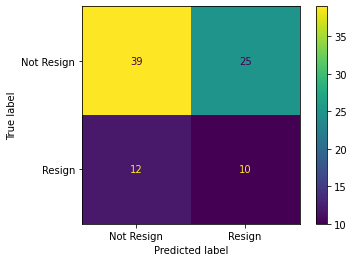

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Resign','Resign'])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'feature importance score')

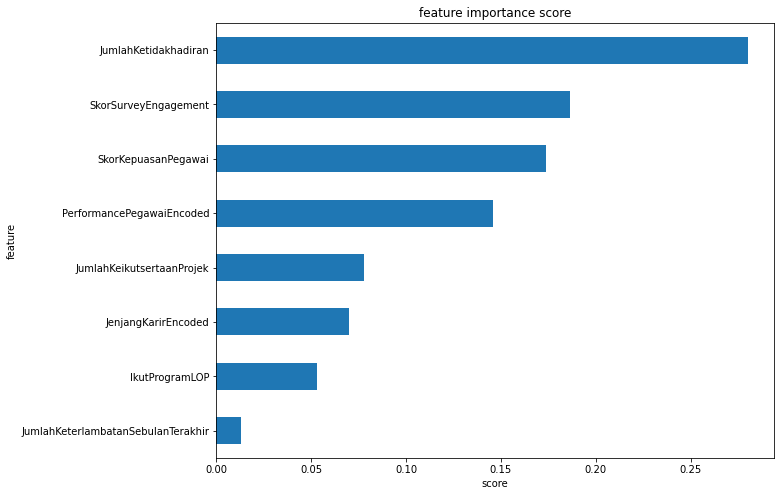

In [130]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [131]:
performance_log = pd.DataFrame(columns=["Experiment","Accuracy","Precission","Recall","AUC"])

perf = {
    "Experiment": "Initial Model (Decission Tree)",
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Accuracy,Precission,Recall,AUC
0,Initial Model (Decission Tree),56.98%,28.57%,45.45%,53.73%


In [133]:
from sklearn.model_selection import GridSearchCV

hyperparams = dict(max_depth = [int(x) for x in np.linspace(5,20,15)],
                   min_samples_split = [int(x) for x in np.linspace(5,20,15)],
                   min_samples_leaf = [int(x) for x in np.linspace(5,20,15)],
                   criterion = ['gini', 'entropy'])

In [134]:
dtc = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(dtc, hyperparams)

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 20],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 20],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 20]})
Accuracy Train :79.92%
Accuracy Test :60.47%
Precission Train :83.76%
Precission Test :30.0%
Recall Train :74.24%
Recall Test :40.91%
F1 Train :78.71%
F1 Test :34.62%
AUC Test :89.18%
AUC Test :58.88%




In [135]:
for key, value in hyperparams.items() :
        print(key+':', clf.best_estimator_.get_params()[key])

max_depth: 8
min_samples_split: 18
min_samples_leaf: 6
criterion: gini


In [149]:
clf = DecisionTreeClassifier(random_state=42, max_depth =8, min_samples_split = 18, min_samples_leaf =6, criterion= 'gini')

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=18,
                       random_state=42)
Accuracy Train :79.92%
Accuracy Test :58.14%
Precission Train :79.7%
Precission Test :28.12%
Recall Train :80.3%
Recall Test :40.91%
F1 Train :80.0%
F1 Test :33.33%
AUC Test :88.06%
AUC Test :53.73%




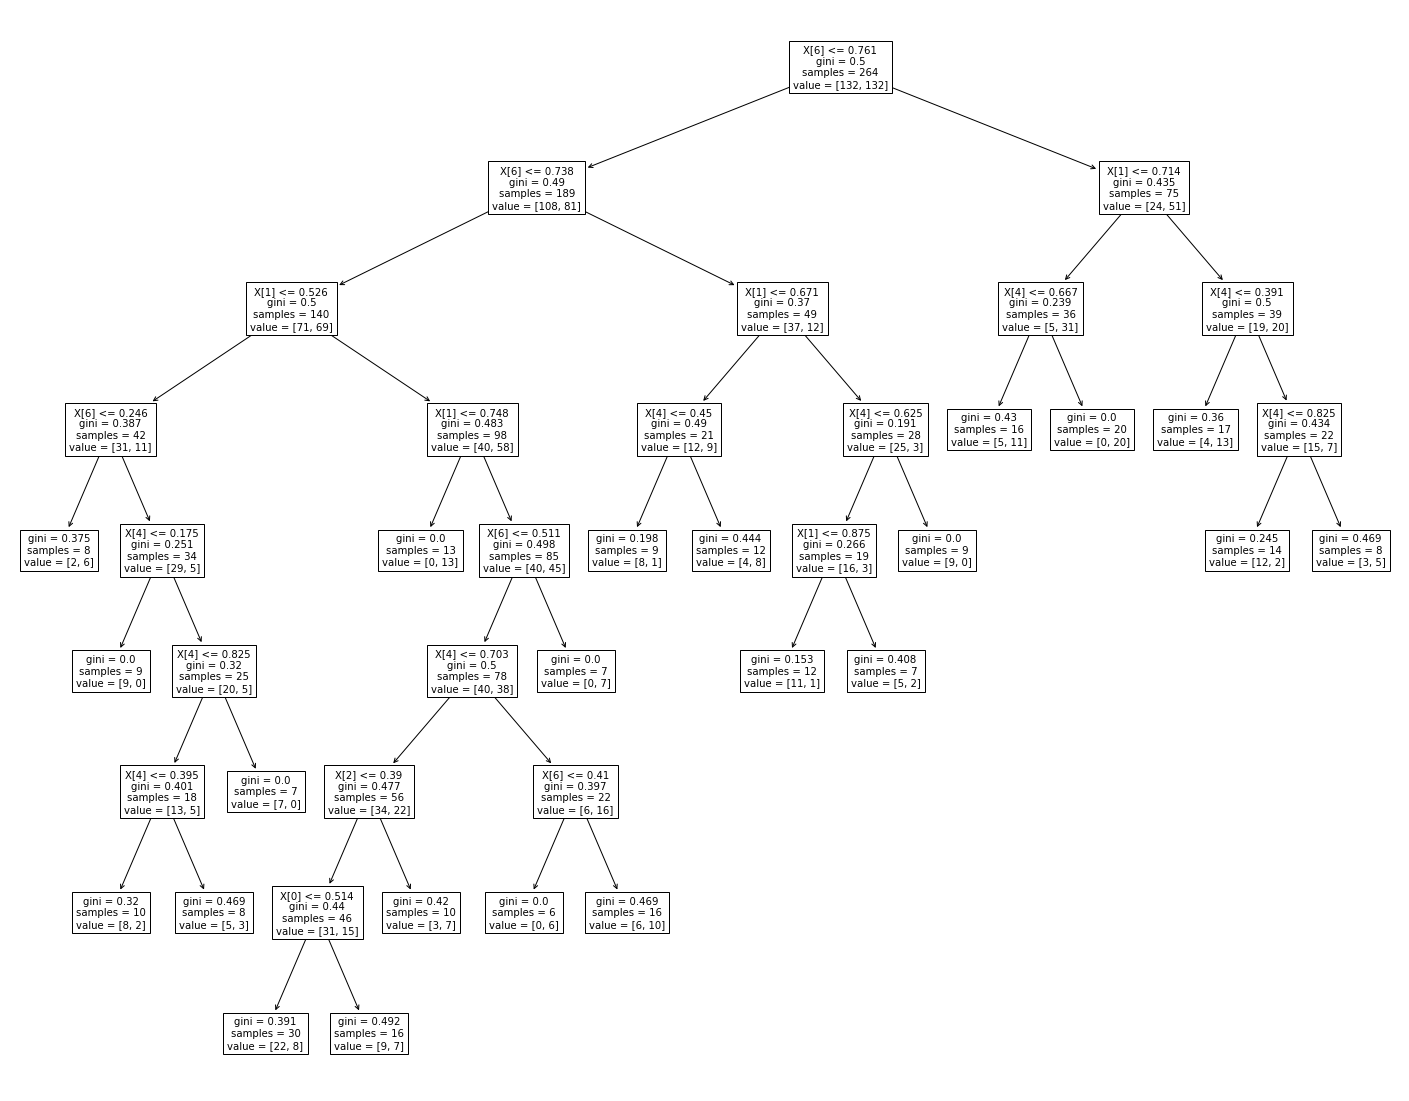

In [158]:
feature_names = []
class_names = []
for i in X_norm:
  feature_names.append(i)
for i in y:
  class_names.append(i)

from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

In [137]:
perf = {
    "Experiment": "Hyperparameter tuning (Decission Tree)",
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Accuracy,Precission,Recall,AUC
0,Initial Model (Decission Tree),56.98%,28.57%,45.45%,53.73%
1,Hyperparameter tuning (Decission Tree),60.47%,30.0%,40.91%,58.88%


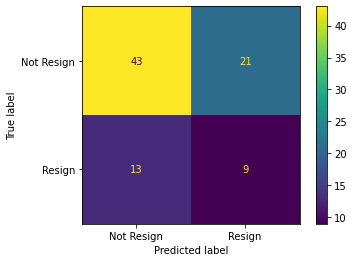

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Resign','Resign'])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'feature importance score')

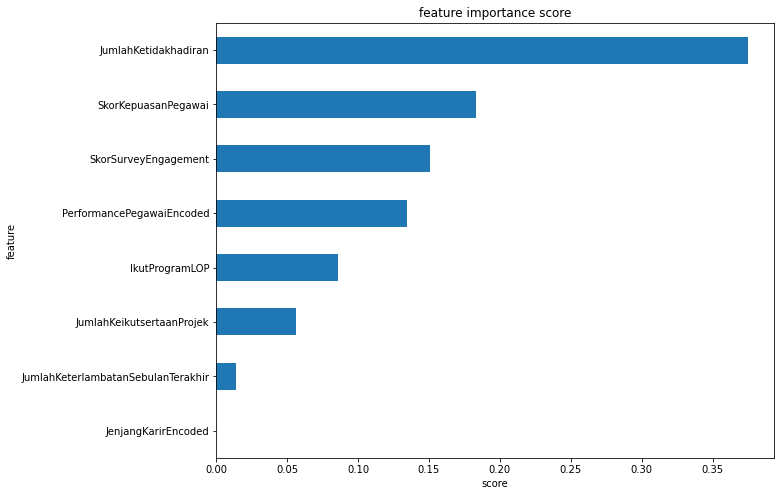

In [139]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [145]:
X_norm = X_norm.drop(columns=['JenjangKarirEncoded'])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.3, random_state=42)
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

In [147]:
clf = DecisionTreeClassifier(random_state=42, max_depth =8, min_samples_split = 18, min_samples_leaf =6, criterion= 'gini')

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=18,
                       random_state=42)
Accuracy Train :79.92%
Accuracy Test :58.14%
Precission Train :79.7%
Precission Test :28.12%
Recall Train :80.3%
Recall Test :40.91%
F1 Train :80.0%
F1 Test :33.33%
AUC Test :88.06%
AUC Test :53.73%




In [148]:
perf = {
    "Experiment": "Hyperparameter tuning (Decission Tree)",
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Accuracy,Precission,Recall,AUC
0,Initial Model (Decission Tree),56.98%,28.57%,45.45%,53.73%
1,Hyperparameter tuning (Decission Tree),60.47%,30.0%,40.91%,58.88%
2,Hyperparameter tuning (Decission Tree),58.14%,28.12%,40.91%,53.73%
